# **Tugas Besar Machine Learning 1 Clustering**

Pada clustering metode yang digunakan menggunakan K-Means. Algoritma ini umumnya bekerja sebagai berikut :


* Menentukan k sebagai jumlah cluster yang akan dibentuk
* Bangkitkan k centriod secara random
* Menghitung jarak setiap data ke centroid terdekat
* Tentukan cluster terdekat untk setiap data dengan membandingkan nilai jarak terdekat, lalu perbaharui nilai pusat clusternya.


# Eksplorasi Data

## Import Library dan Dataset

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/ridhwanashir/ML-Clustering1/main/salju_train.csv'
dataset = pd.read_csv(url) 

In [ ]:
# Cek head dari dataset
dataset.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [ ]:
# Cek tipe-tipe dataset
dataset.dtypes

id                            int64
Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
BersaljuBesok                object
dtype: object

In [ ]:
dataset.describe

<bound method NDFrame.describe of             id     Tanggal KodeLokasi  ...  Suhu3pm  BersaljuHariIni  BersaljuBesok
0            1  01/06/2014         C4  ...     15.0               Ya          Tidak
1            2  15/07/2014        C10  ...     15.5               Ya             Ya
2            3  16/02/2011        C46  ...     29.6            Tidak          Tidak
3            4  08/08/2012        C36  ...     23.2            Tidak          Tidak
4            5  29/10/2016         C7  ...     18.1            Tidak          Tidak
...        ...         ...        ...  ...      ...              ...            ...
109090  109091  31/01/2009        C38  ...     22.1            Tidak             Ya
109091  109092  03/11/2010        C16  ...     24.4            Tidak             Ya
109092  109093  11/11/2010        C17  ...     19.8               Ya          Tidak
109093  109094  16/04/2012        C11  ...     29.2            Tidak          Tidak
109094  109095  09/10/2011        C16  ...

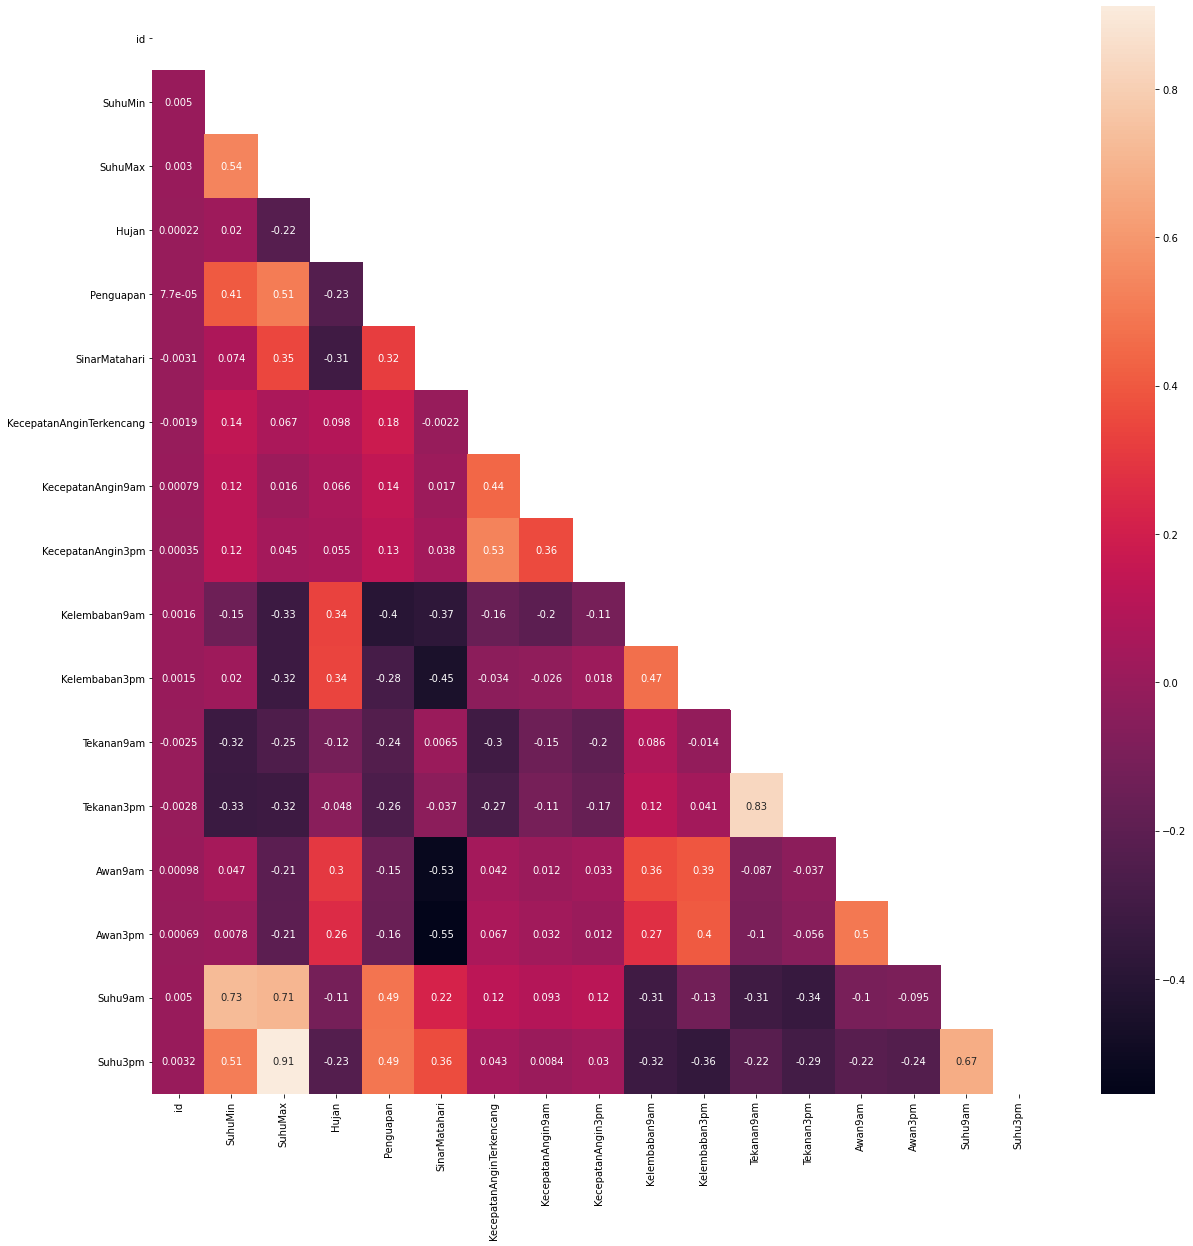

In [ ]:
# Cek korelasi antar fitur menggunakan metode korelasi kendall dengan visualisasi heatmap
import seaborn as sns

plt.figure(figsize=(20,20))
datacorrelation = dataset.corr(method="kendall")

# Menggunakan mask untuk menampilkan segitiga bawah dari heatmap saja
mask = np.triu(np.ones_like(datacorrelation, dtype=bool))
sns.heatmap(datacorrelation,mask=mask, annot=True)

## Pemilihan Fitur

Pemilihan fitur dilakukan dengan membentuk sebuah fungsi yang menyaring fitur dari heatmap dengan menggunakan threshold. Saya mengambil fitur yang  mendekati nilai 1 karena memiliki korelasi antar fitur yang kuat. Threshold yang saya gunakan adalah 0.55

In [ ]:
# Pendefinisian fungsi pemilihan fitur
def featurecorrelation(correlated_data, threshold): # parameter berupa dataframe dan nilai threshold
  output = set()  
  for i in range(len(correlated_data.columns)):
    for j in range(i):
      if abs(correlated_data.iloc[i, j]) > threshold: 
        column_name = correlated_data.columns[i]  
        output.add(column_name)
  return output # output berupa nama-nama fitur (kolom)

In [ ]:
# Proses pemilihan fitur
selected_feature = featurecorrelation(datacorrelation, 0.55)
selected_feature # menampilkan fitur terpilih

{'Awan3pm', 'Suhu3pm', 'Suhu9am', 'Tekanan3pm'}

In [ ]:
# Membuat dataframe baru berdasarkan fitur terpilih
selected_DF = dataset[selected_feature]
selected_DF.to_csv('Salju_baru.csv')
selected_DF.head()

,Suhu3pm,Awan3pm,Tekanan3pm,Suhu9am
0,15.0,NaN,1018.5,13.1
1,15.5,5.0,1014.6,11.9
2,29.6,NaN,NaN,23.8
3,23.2,7.0,1016.9,15.3
4,18.1,6.0,1014.7,12.4


# Data Preprocessing 

## Duplikasi Data

In [ ]:
# Cek data duplikat
duplicate_check = selected_DF.duplicated()
print("Sebelum")
print('Jumlah Data Duplikat = %d' % (duplicate_check.sum()))
print('Total Data = %d' % (selected_DF.shape[0]))
print('\n')
# Hapus data duplikat
selected_DF = selected_DF.drop_duplicates()
duplicate_check = selected_DF.duplicated()
print("Sesudah")
print('Jumlah Data Duplikat = %d' % (duplicate_check.sum()))
print('Total Data = %d' % (selected_DF.shape[0]))

Sebelum
Jumlah Data Duplikat = 2471
Total Data = 109095


Sesudah
Jumlah Data Duplikat = 0
Total Data = 106624


## Missing Value

In [ ]:
# Cek missing value
missingdata=selected_DF.isnull().sum().sort_values(ascending = False)
print(missingdata)

Awan3pm       42108
Tekanan3pm     9059
Suhu3pm        1332
Suhu9am         496
dtype: int64


### Percobaan 1

In [ ]:
# Melakukan drop pada data null 
treated_DF = selected_DF.dropna(how='any',subset=selected_feature)
treated_DF.isnull().sum()

Suhu3pm       0
Awan3pm       0
Tekanan3pm    0
Suhu9am       0
dtype: int64

### Percobaan 2

Cek nilai Skewness dari data.jika normal (-2 .. 2), maka data null diisi dengan mean. sedangkan jika tidak normal diisi dengan median.

In [ ]:
selected_DF[selected_feature].skew(axis=0, skipna=True)

Awan3pm      -0.227249
Suhu3pm       0.243328
Suhu9am       0.087144
Tekanan3pm   -0.049644
dtype: float64

In [ ]:
selected_DF['Suhu3pm'].fillna(selected_DF['Suhu3pm'].mean(),inplace=True)
selected_DF['Suhu9am'].fillna(selected_DF['Suhu9am'].mean(),inplace=True)
selected_DF['Tekanan3pm'].fillna(selected_DF['Tekanan3pm'].mean(),inplace=True)
selected_DF['Awan3pm'].fillna(selected_DF['Awan3pm'].mean(),inplace=True)
treated_DF = selected_DF

In [ ]:
#Checking Missing Value
missing = treated_DF.isnull().sum().sort_values(ascending = False)
print(missing)

Tekanan3pm    0
Suhu9am       0
Suhu3pm       0
Awan3pm       0
dtype: int64


## Outlier

<Figure size 600x400 with 0 Axes>

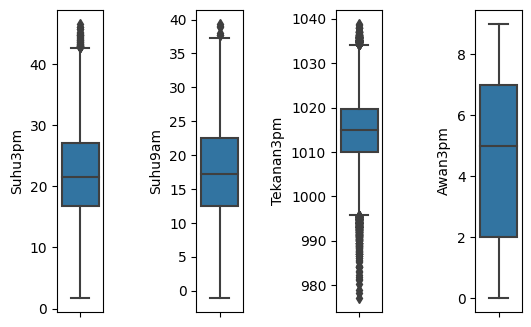

In [ ]:
# Cek sebaran data terpilih
mpl.rcParams['figure.dpi'] = 100 # resolusi grafik
plt.figure()
f, axes = plt.subplots(1, len(selected_feature))
sns.boxplot(y=treated_DF["Suhu3pm"], ax=axes[0])
sns.boxplot(y=treated_DF["Suhu9am"], ax=axes[1])
sns.boxplot(y=treated_DF["Tekanan3pm"], ax=axes[2])
sns.boxplot(y=treated_DF["Awan3pm"], ax=axes[3])

plt.subplots_adjust(wspace=2)

In [ ]:
# Mendefinisikan fungsi deteksi outlier univariat menggunakan inter quartile range (IQR)
def outlier_detection(data):
  sorted(data)
  Q3,Q1 = np.percentile(data , [75,25])
  IQR = Q3-Q1
  upper_range = Q3 + (1.5 * IQR)
  lower_range = Q1 - (1.5 * IQR)
  return lower_range,upper_range

**Melakukan deteksi outlier pada masing-masing fitur**

In [ ]:
lowerbound,upperbound = outlier_detection(treated_DF['Suhu3pm'])
treated_DF[(treated_DF['Suhu3pm'] < lowerbound) | (treated_DF['Suhu3pm'] > upperbound)].index

Int64Index([   695,   8817,  15875,  16014,  17512,  17792,  26880,  27670,
             29116,  36209,  36319,  41865,  43779,  43875,  46542,  47235,
             49895,  50753,  51841,  54011,  54768,  62884,  63126,  66584,
             68452,  79108,  80848,  81904,  82584,  88487,  93063,  94343,
            106444, 108653],
           dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_detection(treated_DF['Suhu9am'])
treated_DF[(treated_DF['Suhu9am'] < lowerbound) | (treated_DF['Suhu9am'] > upperbound)].index

Int64Index([2289, 5633, 32798, 43235, 51841, 94872], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_detection(treated_DF['Awan3pm'])
treated_DF[(treated_DF['Awan3pm'] < lowerbound) | (treated_DF['Awan3pm'] > upperbound)].index

Int64Index([], dtype='int64')

In [ ]:
lowerbound,upperbound = outlier_detection(treated_DF['Tekanan3pm'])
treated_DF[(treated_DF['Tekanan3pm'] < lowerbound) | (treated_DF['Tekanan3pm'] > upperbound)].index

Int64Index([    33,    448,    489,    710,    782,    897,   1633,   2091,
              2175,   2264,
            ...
            107572, 107573, 107600, 107771, 107867, 108245, 108700, 108766,
            108902, 109001],
           dtype='int64', length=407)

**Handling Outlier**

In [ ]:
# Menassign outlier dengan nilai kosong (NaN)
lowerbound,upperbound = outlier_detection(treated_DF['Suhu3pm'])
treated_DF.loc[(treated_DF['Suhu3pm'] < lowerbound) | (treated_DF['Suhu3pm'] > upperbound),'Suhu3pm']=np.NaN

lowerbound,upperbound = outlier_detection(treated_DF['Suhu9am'])
treated_DF.loc[(treated_DF['Suhu9am'] < lowerbound) | (treated_DF['Suhu9am'] > upperbound),'Suhu9am']=np.NaN

lowerbound,upperbound = outlier_detection(treated_DF['Tekanan3pm'])
treated_DF.loc[(treated_DF['Tekanan3pm'] < lowerbound) | (treated_DF['Tekanan3pm'] > upperbound),'Tekanan3pm']=np.NaN

lowerbound,upperbound = outlier_detection(treated_DF['Awan3pm'])
treated_DF.loc[(treated_DF['Awan3pm'] < lowerbound) | (treated_DF['Awan3pm'] > upperbound),'Awan3pm']=np.NaN

### Percobaan 1

In [ ]:
# Melakukan drop pada data kosong
treated_DF = treated_DF.dropna()
treated_DF.isnull().sum()

Suhu3pm       0
Awan3pm       0
Tekanan3pm    0
Suhu9am       0
dtype: int64

### Percobaan 2

In [ ]:
# Mengisi data outlier dengan nilai mean
treated_DF['Suhu3pm'].fillna(treated_DF['Suhu3pm'].mean(),inplace=True)
treated_DF['Suhu9am'].fillna(treated_DF['Suhu9am'].mean(),inplace=True)
treated_DF['Tekanan3pm'].fillna(treated_DF['Tekanan3pm'].mean(),inplace=True)
treated_DF['Awan3pm'].fillna(treated_DF['Awan3pm'].mean(),inplace=True)

<Figure size 600x400 with 0 Axes>

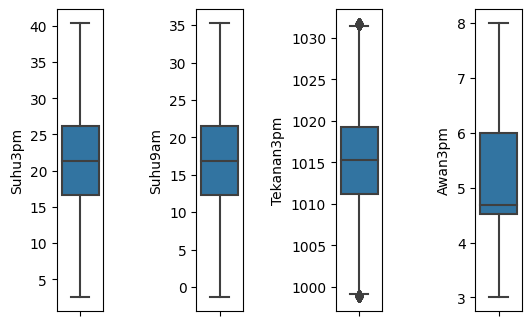

In [ ]:
# Cek sebaran data setelah handling outlier
plt.figure()
f, axes = plt.subplots(1, len(selected_feature))
sns.boxplot(y=treated_DF["Suhu3pm"], ax=axes[0])
sns.boxplot(y=treated_DF["Suhu9am"], ax=axes[1])
sns.boxplot(y=treated_DF["Tekanan3pm"], ax=axes[2])
sns.boxplot(y=treated_DF["Awan3pm"], ax=axes[3])

plt.subplots_adjust(wspace=2)

## Feature Scaling

Tahap scaling memiliki fungsi untuk mengkonversi nilai dari setiap fitur dalam rentang yang sama sehingga bobot dari masing-masing fitur setara. Proses scaling yang saya gunakan adalah normalisasi menggunakan bantuan library MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaled_Arr = MinMaxScaler().fit_transform(treated_DF)
scaled_Arr

array([[0.33658537, 0.55555556, 0.4921875 , 0.33942559],
       [0.52439024, 0.77777778, 0.55208333, 0.42819843],
       [0.4       , 0.66666667, 0.49479167, 0.35248042],
       ...,
       [0.50487805, 0.11111111, 0.54427083, 0.58224543],
       [0.49756098, 0.66666667, 0.5703125 , 0.60313316],
       [0.67073171, 0.11111111, 0.5234375 , 0.59530026]])

## PCA

Principal Component Analysis (PCA) adalah sebuah teknik statistik unsupervised dan non-parametric yang digunakan untuk mengurangi dimensi dari sebuah data. Untuk mengurangi dimensi dari data fitur, saya gunakan teknik PCA ini.

In [ ]:
# Mereduksi dimensi data menggunakan pca
from sklearn.decomposition import PCA

pca_decomp = PCA(n_components=2)
pca_array = pca_decomp.fit_transform(scaled_Arr)
PCA_DF = pd.DataFrame(data = pca_array, columns = ['x', 'y'])
PCA_DF.head()

,x,y
0,-0.131171,-0.144445
1,-0.265183,0.040191
2,-0.212665,-0.070699
3,-0.267712,0.098949
4,0.306029,-0.179249


In [ ]:
# Melakukan normalisasi data dengan scaled 0-10 untuk persiapan clustering
Scaled_PCA_Arr = MinMaxScaler(feature_range=(0,10)).fit_transform(PCA_DF)
Scaled_PCA_Arr

array([[3.5107398 , 3.87993596],
       [2.4737902 , 5.02002765],
       [2.88016083, 4.3353031 ],
       ...,
       [7.47291178, 4.21835316],
       [3.48649329, 5.28633653],
       [7.88852956, 4.84975337]])

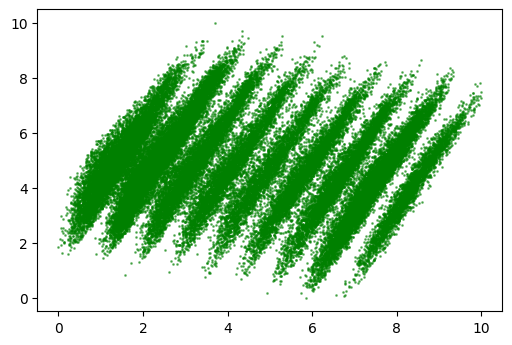

In [ ]:
# Visualisasi data hasil PCA
plt.scatter(Scaled_PCA_Arr[:,0], Scaled_PCA_Arr[:,1], s=1, c="green", alpha=.5)
plt.show()

# Modeling

Pada tahap modeling saya menggunakan algoritma kmeans untuk clustering datanya.

In [ ]:
# Mendefinisikan fungsi euclid_dist untuk menghitung Euclidian Distance antara titik a dengan b
def euclid_dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [ ]:
# Mendefinisikan kelas KMeans
class KMeans:
  def __init__(self, k, data, iteration): # inisialisasi kelas
    np.random.seed(1301184259)
    Cent_X = np.random.randint(np.min(data), np.max(data), size=k) 
    Cent_Y = np.random.randint(np.min(data), np.max(data), size=k) 
    self.data = data
    self.k = k
    self.iteration = iteration
    self.Centroid = np.array(list(zip(Cent_X, Cent_Y)), dtype=np.float64)
    self.rows = len(data) # menyimpan nilai baris data   
    self.clusters = np.zeros(self.rows)              

  def calc_dist(self): # menghitung jarak
    for i in range(self.rows):
      distance = euclid_dist(self.data[i], self.Centroid) # menghitung jarak data (points) dengan masing-masing centroids
      min_index = np.argmin(distance) # menyimpan index cluster dari nilai jarak terkecil
      self.clusters[i] = min_index # menyimpan index cluster data ke array

  def calc_cent(self): # mengganti nilai centeroid
    for i in range(self.k): 
      points = [self.data[j] for j in range(self.rows) if self.clusters[j] == i] # mengelompokkan data koordinat berdasarkan centroidnya
      self.Centroid[i] = np.mean(points, axis=0) # mengubah nilai centroid dengan nilai koordinat rata-rata pada cluster
  
  def epsilon_iteration(self): # menghitung nilai epsilon
    x = np.zeros(self.k)
    temp_epsilon = np.zeros(self.iteration)
    for n in range (self.iteration):
      self.calc_dist()
      self.calc_cent()
      for i in range(self.k): 
        points2 = np.array([self.data[j] for j in range(self.rows) if self.clusters[j] == i]) 
        x[i] = (euclid_dist(points2, self.Centroid[i])).sum() # menghitung jarak setiap point dengan centroidnya pada masing-masing clusternya (cost)
      temp_epsilon[n] = np.sum(x) # menyimpan total cost pada array temp_epsilon
    return temp_epsilon
  

## Grafik Epsilon/Cost

Melakukan percobaan untuk melihat hubungan antara epsilon/cost dengan iterasi

In [ ]:
# Menghitung epsilon/cost tiap iterasi
k = 4
iterasi = 10
Clustering = KMeans(k, Scaled_PCA_Arr, iterasi) # mendefinisikan clustering dengan k=4 dan iterasi=10
temp_epsilon = Clustering.epsilon_iteration()


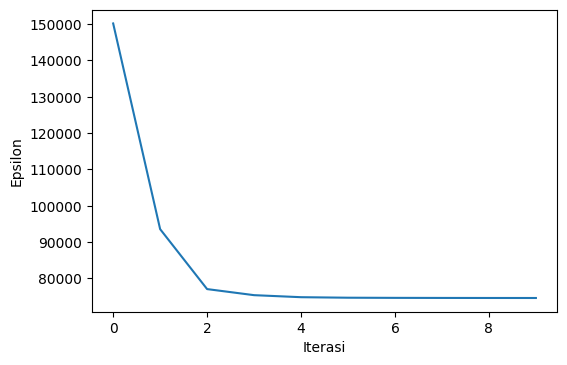

In [ ]:
# Visualisasi grafik cost dengan iterasi
ax = sns.lineplot(data=temp_epsilon)
ax.set(xlabel='Iterasi', ylabel='Epsilon')
plt.show()

## Grafik Clustering

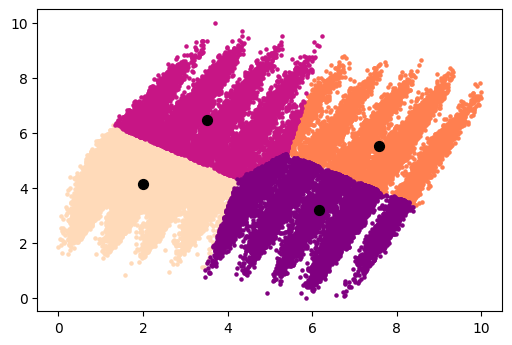

In [ ]:
# Visualisasi sebaran data hasil clustering
colors = ['peachpuff', 'coral', 'mediumvioletred', 'purple']
fig, ax = plt.subplots()
for i in range(Clustering.k):
    points = np.array([Clustering.data[j] for j in range(Clustering.rows) if Clustering.clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(Clustering.Centroid[:, 0], Clustering.Centroid[:, 1], s=50, c='black')

## Dataframe Cluster

Pembentukan dataframe baru hasil clustering dan menyimpannya dalam bentuk csv untuk kebutuhan selanjutnya

In [ ]:
Cluster_DF = PCA_DF
Cluster_DF['Cluster'] = Clustering.clusters+1

In [ ]:
Cluster_DF.head()

,x,y,Cluster
0,-0.131171,-0.144445,1.0
1,-0.265183,0.040191,1.0
2,-0.212665,-0.070699,1.0
3,-0.267712,0.098949,1.0
4,0.306029,-0.179249,4.0


In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
Cluster_DF.to_csv('data_percobaan1.csv')
!cp data.csv "drive/My Drive/"

# Evaluasi

Evaluasi clustering data dengan menggunakan metode elbow curve untuk melihat nilai k terbaik

## Elbow Curve

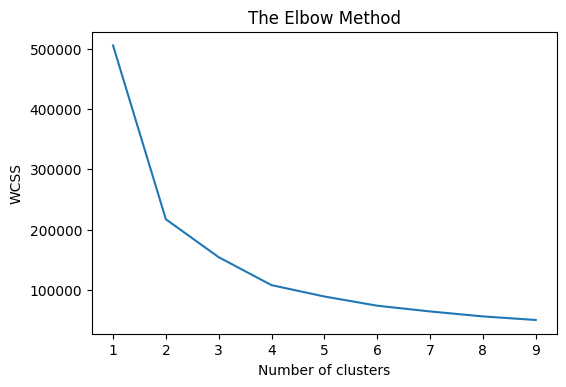

In [ ]:
# Evaluasi Elbow Curve
from sklearn.cluster import KMeans

WCSS_Arr = [] # array within cluster sum of square

for i in range(1, 10): # iterasi dari 1 sampai 10
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1301184259)
    kmeans.fit(Scaled_PCA_Arr)
    WCSS_Arr.append(kmeans.inertia_)

# Visualisasi 
plt.plot(range(1, 10), WCSS_Arr)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
